In [51]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
import librosa
import librosa.display

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import seaborn as sns
from tensorflow.keras import utils
from pathlib import Path

In [159]:
from keras.preprocessing import sequence


In [52]:
 physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

In [53]:
import os
import re

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Audio
# from entropy import spectral_entropy
from keras import layers
from keras import models
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import itertools

In [34]:
Crema_path='./Voice/Crema'
Ravdess_path='./Voice/Ravdess'
Savee_path='./Voice/Savee'
Tess_path='./Voice/Tess'


In [35]:
Crema_list=os.listdir(Crema_path)
print(Crema_list)


['1022_ITS_ANG_XX.wav', '1037_ITS_ANG_XX.wav', '1060_ITS_NEU_XX.wav', '1075_ITS_NEU_XX.wav', '1073_IOM_DIS_XX.wav', '1066_IOM_DIS_XX.wav', '1078_IWL_SAD_XX.wav', '1029_TAI_FEA_XX.wav', '1039_IEO_SAD_MD.wav', '1008_TAI_HAP_XX.wav', '1018_TSI_FEA_XX.wav', '1028_IEO_SAD_HI.wav', '1039_TSI_HAP_XX.wav', '1064_ITS_HAP_XX.wav', '1071_ITS_HAP_XX.wav', '1045_ITS_FEA_XX.wav', '1050_ITS_FEA_XX.wav', '1018_IWL_ANG_XX.wav', '1059_IEO_ANG_MD.wav', '1054_MTI_DIS_XX.wav', '1041_MTI_DIS_XX.wav', '1048_IEO_ANG_HI.wav', '1042_ITS_SAD_XX.wav', '1019_TAI_NEU_XX.wav', '1057_ITS_SAD_XX.wav', '1028_TSI_NEU_XX.wav', '1087_IOM_ANG_XX.wav', '1039_IEO_HAP_LO.wav', '1018_IEO_FEA_LO.wav', '1079_DFA_NEU_XX.wav', '1063_IWW_DIS_XX.wav', '1076_IWW_DIS_XX.wav', '1068_WSI_HAP_XX.wav', '1049_WSI_FEA_XX.wav', '1059_ITH_DIS_XX.wav', '1068_DFA_HAP_XX.wav', '1049_DFA_FEA_XX.wav', '1079_WSI_NEU_XX.wav', '1082_IWW_ANG_XX.wav', '1061_ITH_NEU_XX.wav', '1074_ITH_NEU_XX.wav', '1023_ITH_ANG_XX.wav', '1036_ITH_ANG_XX.wav', '1005_IEO_

In [36]:
Crema_dir=Path('./Voice/Crema')

In [37]:
part2=Crema_list[1].partition(".wav")[0].split("_")
print(part2)


['1037', 'ITS', 'ANG', 'XX']


In [38]:
filepaths = list(Crema_dir.glob(r'**/*.wav'))
filepaths

[PosixPath('Voice/Crema/1022_ITS_ANG_XX.wav'),
 PosixPath('Voice/Crema/1037_ITS_ANG_XX.wav'),
 PosixPath('Voice/Crema/1060_ITS_NEU_XX.wav'),
 PosixPath('Voice/Crema/1075_ITS_NEU_XX.wav'),
 PosixPath('Voice/Crema/1073_IOM_DIS_XX.wav'),
 PosixPath('Voice/Crema/1066_IOM_DIS_XX.wav'),
 PosixPath('Voice/Crema/1078_IWL_SAD_XX.wav'),
 PosixPath('Voice/Crema/1029_TAI_FEA_XX.wav'),
 PosixPath('Voice/Crema/1039_IEO_SAD_MD.wav'),
 PosixPath('Voice/Crema/1008_TAI_HAP_XX.wav'),
 PosixPath('Voice/Crema/1018_TSI_FEA_XX.wav'),
 PosixPath('Voice/Crema/1028_IEO_SAD_HI.wav'),
 PosixPath('Voice/Crema/1039_TSI_HAP_XX.wav'),
 PosixPath('Voice/Crema/1064_ITS_HAP_XX.wav'),
 PosixPath('Voice/Crema/1071_ITS_HAP_XX.wav'),
 PosixPath('Voice/Crema/1045_ITS_FEA_XX.wav'),
 PosixPath('Voice/Crema/1050_ITS_FEA_XX.wav'),
 PosixPath('Voice/Crema/1018_IWL_ANG_XX.wav'),
 PosixPath('Voice/Crema/1059_IEO_ANG_MD.wav'),
 PosixPath('Voice/Crema/1054_MTI_DIS_XX.wav'),
 PosixPath('Voice/Crema/1041_MTI_DIS_XX.wav'),
 PosixPath('V

In [39]:
emo=[]
for i in Crema_list:
    part=i.split("_")
    if part[2]== 'ANG':
        emo.append("Angry")
    elif part[2] == 'DIS':
        emo.append("Disgust")
    elif part[2] == 'FEA':
        emo.append("Fear")
    elif part[2] == 'HAP':
        emo.append("Happy")
    elif part[2] == 'NEU':
        emo.append("Neutral")
    elif part[2] == 'SAD':
        emo.append("Sad")
    else:
        emo.appende("unkown")
        
file=pd.Series(filepaths, name='Path')
label=pd.Series(emo, name='Label')
Crema = pd.concat([file,label], axis=1)
Crema


Path    Label
0     Voice/Crema/1022_ITS_ANG_XX.wav    Angry
1     Voice/Crema/1037_ITS_ANG_XX.wav    Angry
2     Voice/Crema/1060_ITS_NEU_XX.wav  Neutral
3     Voice/Crema/1075_ITS_NEU_XX.wav  Neutral
4     Voice/Crema/1073_IOM_DIS_XX.wav  Disgust
...                               ...      ...
7437  Voice/Crema/1089_WSI_ANG_XX.wav    Angry
7438  Voice/Crema/1025_IWW_ANG_XX.wav    Angry
7439  Voice/Crema/1030_IWW_ANG_XX.wav    Angry
7440  Voice/Crema/1019_TIE_ANG_XX.wav    Angry
7441  Voice/Crema/1079_IEO_NEU_XX.wav  Neutral

[7442 rows x 2 columns]

In [40]:
Crema.shape

(7442, 2)

In [41]:
part2=Crema_list[1].partition(".wav")[0].split("_")
print(part2[0])

1037


In [42]:
#숫자가 1080이상인건 테스트셋으로 나머지 트레이닝으로

    
num = []
for i in Crema_list:
    part=i.split("_")
    if part[0] >= '1080':
        num.append("Test")
    else:
        num.append("Train")

    
Crema['set'] = num
Crema

Path    Label    set
0     Voice/Crema/1022_ITS_ANG_XX.wav    Angry  Train
1     Voice/Crema/1037_ITS_ANG_XX.wav    Angry  Train
2     Voice/Crema/1060_ITS_NEU_XX.wav  Neutral  Train
3     Voice/Crema/1075_ITS_NEU_XX.wav  Neutral  Train
4     Voice/Crema/1073_IOM_DIS_XX.wav  Disgust  Train
...                               ...      ...    ...
7437  Voice/Crema/1089_WSI_ANG_XX.wav    Angry   Test
7438  Voice/Crema/1025_IWW_ANG_XX.wav    Angry  Train
7439  Voice/Crema/1030_IWW_ANG_XX.wav    Angry  Train
7440  Voice/Crema/1019_TIE_ANG_XX.wav    Angry  Train
7441  Voice/Crema/1079_IEO_NEU_XX.wav  Neutral  Train

[7442 rows x 3 columns]

In [14]:
import IPython.display
disfile = np.array(Crema[Crema['Label'] == 'Angry']['Path'])
IPython.display.Audio(disfile[1],rate=44100)


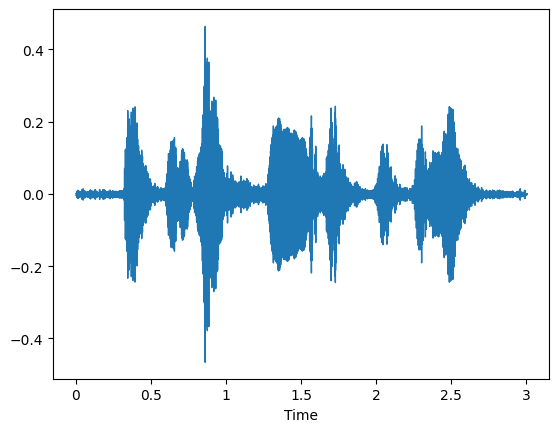

In [15]:
data, sr = librosa.load(disfile[1])
librosa.display.waveshow(data, sr=sr)

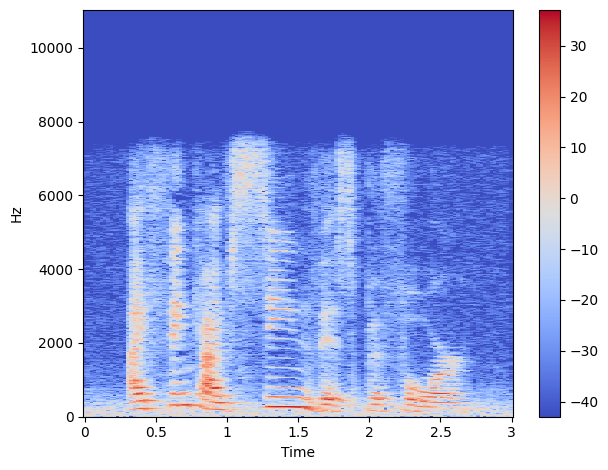

In [16]:
stft=librosa.stft(data)
db=librosa.amplitude_to_db(abs(stft))
librosa.display.specshow(db,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()
plt.tight_layout()

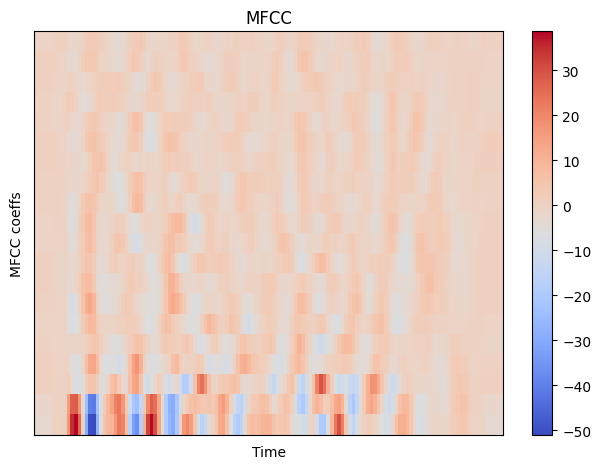

In [17]:
mfcc = librosa.feature.mfcc(S=db,sr=sr)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

In [18]:
import IPython.display
disfile2 = np.array(Crema[Crema['Label'] == 'Disgust']['Path'])
IPython.display.Audio(disfile2[1],rate=44100)


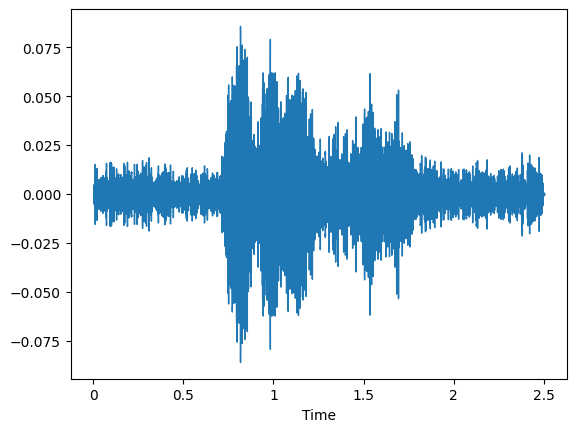

In [19]:
data, sr = librosa.load(disfile2[1])
librosa.display.waveshow(data, sr=sr)

In [20]:
import IPython.display
disfile3 = np.array(Crema[Crema['Label'] == 'Fear']['Path'])
IPython.display.Audio(disfile3[1],rate=44100)

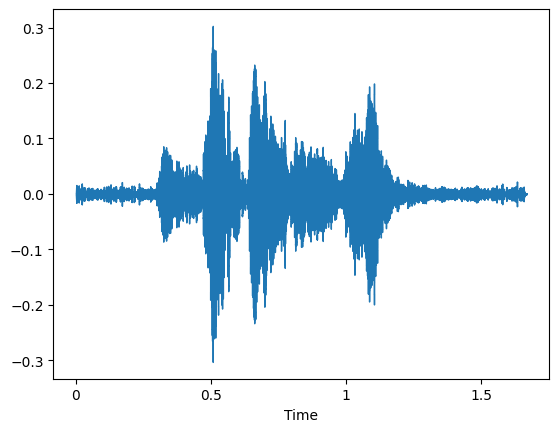

In [21]:
data, sr = librosa.load(disfile3[1])
librosa.display.waveshow(data, sr=sr)

In [319]:
import IPython.display
disfile4 = np.array(Crema[Crema['Label'] == 'Happy']['Path'])
IPython.display.Audio(disfile4[1],rate=44100)

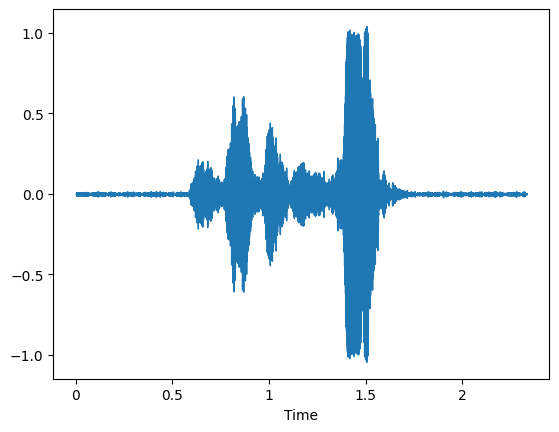

In [320]:
data, sr = librosa.load(disfile4[1])
librosa.display.waveshow(data, sr=sr)

In [321]:
import IPython.display
disfile5 = np.array(Crema[Crema['Label'] == 'Neutral']['Path'])
IPython.display.Audio(disfile5[1],rate=44100)

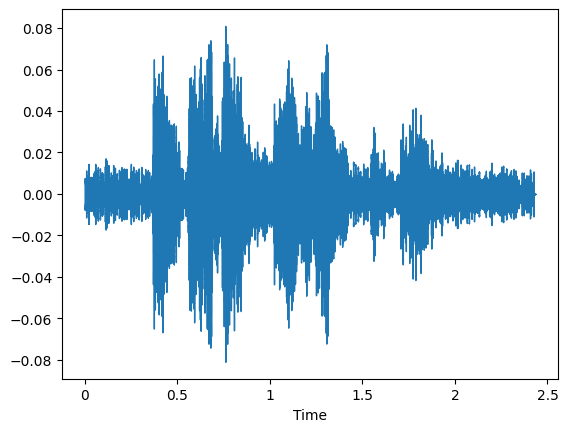

In [322]:
data, sr = librosa.load(disfile5[1])
librosa.display.waveshow(data, sr=sr)

In [323]:
import IPython.display
disfile6 = np.array(Crema[Crema['Label'] == 'Sad']['Path'])
IPython.display.Audio(disfile6[1],rate=44100)

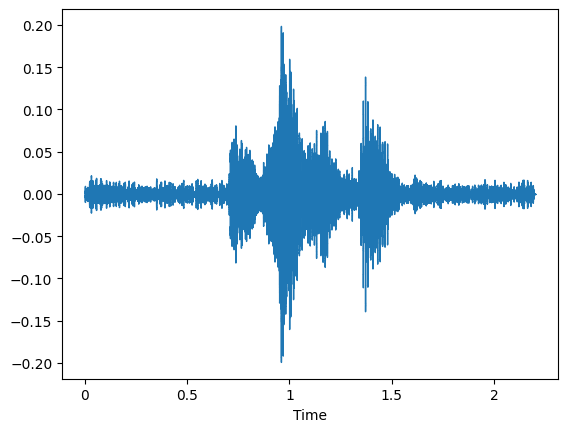

In [324]:
data, sr = librosa.load(disfile6[1])
librosa.display.waveshow(data, sr=sr)

In [325]:
stretch=librosa.effects.time_stretch(data,rate=0.5)
IPython.display.Audio(stretch,rate=44100)

In [43]:
audio_array = []
for i in Crema['Path']:
    x, sr = librosa.load(i, sr=44100)
    audio_array.append(x)
    
Crema['Arrays'] = audio_array
Crema

Path    Label    set  \
0     Voice/Crema/1022_ITS_ANG_XX.wav    Angry  Train   
1     Voice/Crema/1037_ITS_ANG_XX.wav    Angry  Train   
2     Voice/Crema/1060_ITS_NEU_XX.wav  Neutral  Train   
3     Voice/Crema/1075_ITS_NEU_XX.wav  Neutral  Train   
4     Voice/Crema/1073_IOM_DIS_XX.wav  Disgust  Train   
...                               ...      ...    ...   
7437  Voice/Crema/1089_WSI_ANG_XX.wav    Angry   Test   
7438  Voice/Crema/1025_IWW_ANG_XX.wav    Angry  Train   
7439  Voice/Crema/1030_IWW_ANG_XX.wav    Angry  Train   
7440  Voice/Crema/1019_TIE_ANG_XX.wav    Angry  Train   
7441  Voice/Crema/1079_IEO_NEU_XX.wav  Neutral  Train   

                                                 Arrays  
0     [0.0002273763, -0.00011216959, -0.0007082728, ...  
1     [0.00015128736, 0.00013183893, 7.187949e-05, 7...  
2     [0.002334212, 0.002904112, 0.0031103645, 0.003...  
3     [-0.0022518907, -0.0023866491, -0.0022416252, ...  
4     [-0.004916129, -0.005844813, -0.006120192, -0....  
...                                                 ...  
7437  [-0.0025177416, -0.0031827956, -0.0035363503, ...  
7438  [-0.0030102863, -0.0038426693, -0.0041711098, ...  
7439  [0.0036753064, 0.0041368552, 0.003920602, 0.00...  
7440  [-0.00021147108, -0.00011830614, 0.00012860754...  
7441  [0.003820697, 0.0039708884, 0.0032883107, 0.00...  

[7442 rows x 4 columns]

In [44]:
Crema_train = Crema[Crema['set']=='Train']
Crema_test = Crema[Crema['set']=='Test']


In [45]:
#data augmentation

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def pitch(data, sampling_rate,pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


In [46]:
#features extract 피쳐 추출
def extract_features(data):
    
    result = np.array([])
    
    #zero crossing rate
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result = np.hstack((result, zcr))
    
    #MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sr, n_fft=200).T, axis=0)
    result = np.hstack((result, mfcc))
    
    #Melspectrogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sr, n_fft=200).T,axis=0)
    result = np.hstack((result, mel))
    
    return result


In [47]:
def get_features(data):
    result = []
    
    #without augmentation
    result1 = extract_features(data)
    result.append(result1)
    
    #with stretch
    stretch_data = stretch(data)
    result2 = extract_features(stretch_data)
    result.append(result2)
    
    #with noise
    noise_data = noise(data)
    result3 = extract_features(noise_data)
    result.append(result3)
    
    #with pitch
    pitch_data = pitch(data, sr)
    result4 = extract_features(pitch_data)
    result.append(result4)
    
    #with stretch and pitch
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sr)
    result5 = extract_features(data_stretch_pitch)
    result.append(result5)
    
    #with stretch and pitch
    data_stretch_noise = noise(new_data)
    result6 = extract_features(data_stretch_noise)
    result.append(result6)
    
    return result


In [189]:

X_train, Y_train =[], []

for i in range(len(Crema_train)):
    feature = get_features(Cre a_train['Arrays'].iloc[i]);
    for j in feature :
        X_train.append(j)
        Y_train.append(Crema_train['Label'].iloc[i])
        

In [190]:
X_train

[array([ 4.86886161e-02, -6.33502319e+02,  3.48548050e+01, -4.05926476e+01,
         2.00564709e+01,  1.52585039e+01, -1.89599152e+01, -8.52842331e+00,
        -7.56455040e+00, -5.64322662e+00, -7.43484449e+00, -1.01582594e+01,
         2.23746705e+00, -6.81120682e+00, -1.22263460e+01,  1.73976004e+00,
        -5.59186602e+00, -1.01566658e+01, -2.87340546e+00, -5.79175138e+00,
        -4.40110970e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.88391405e-01,
         4.89946827e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.46380174e+00,  4.22623396e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.10091972e+00,  5.57219386e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.80219054e-01,  1.46304980e-01,  0.00000000e+00,  0.00000000e+00,
         0.0

In [191]:
Y_train

['Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Disgust',
 'Disgust',
 'Disgust',
 'Disgust',
 'Disgust',
 'Disgust',
 'Disgust',
 'Disgust',
 'Disgust',
 'Disgust',
 'Disgust',
 'Disgust',
 'Sad',
 'Sad',
 'Sad',
 'Sad',
 'Sad',
 'Sad',
 'Fear',
 'Fear',
 'Fear',
 'Fear',
 'Fear',
 'Fear',
 'Sad',
 'Sad',
 'Sad',
 'Sad',
 'Sad',
 'Sad',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Fear',
 'Fear',
 'Fear',
 'Fear',
 'Fear',
 'Fear',
 'Sad',
 'Sad',
 'Sad',
 'Sad',
 'Sad',
 'Sad',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Fear',
 'Fear',
 'Fear',
 'Fear',
 'Fear',
 'Fear',
 'Fear',
 'Fear',
 'Fear',
 'Fear',
 'Fear',
 

In [192]:

X_test, Y_test =[], []

for i in range(len(Crema_test)):
        X_test.append(Crema_test['Arrays'].iloc[i])
        Y_test.append(Crema_test['Label'].iloc[i])

In [194]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [186]:
Y_test

['Angry',
 'Angry',
 'Sad',
 'Sad',
 'Fear',
 'Happy',
 'Fear',
 'Happy',
 'Happy',
 'Sad',
 'Happy',
 'Sad',
 'Neutral',
 'Angry',
 'Neutral',
 'Disgust',
 'Fear',
 'Fear',
 'Sad',
 'Happy',
 'Fear',
 'Happy',
 'Sad',
 'Neutral',
 'Disgust',
 'Happy',
 'Happy',
 'Angry',
 'Neutral',
 'Fear',
 'Sad',
 'Angry',
 'Happy',
 'Angry',
 'Disgust',
 'Disgust',
 'Neutral',
 'Fear',
 'Angry',
 'Disgust',
 'Happy',
 'Neutral',
 'Neutral',
 'Neutral',
 'Fear',
 'Happy',
 'Disgust',
 'Happy',
 'Disgust',
 'Disgust',
 'Angry',
 'Angry',
 'Neutral',
 'Neutral',
 'Happy',
 'Sad',
 'Happy',
 'Fear',
 'Fear',
 'Happy',
 'Fear',
 'Fear',
 'Sad',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Happy',
 'Sad',
 'Fear',
 'Neutral',
 'Angry',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Neutral',
 'Happy',
 'Sad',
 'Fear',
 'Happy',
 'Happy',
 'Sad',
 'Sad',
 'Fear',
 'Neutral',
 'Disgust',
 'Neutral',
 'Sad',
 'Happy',
 'Neutral',
 'Neutral',
 'Neutral',
 'Happy',
 'Neutral',
 'Disgust',
 'Neutral',
 'Sad',
 'Neutr

In [193]:
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen = 149)
print(X_test.shape)

(984, 149)


In [195]:
le = LabelEncoder()
Y_train = utils.to_categorical(le.fit_transform(Y_train))
Y_train

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [196]:
le = LabelEncoder()
Y_test = utils.to_categorical(le.fit_transform(Y_test))
Y_test

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [197]:
X_train=np.array(X_train)
X_test=np.array(X_test)
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)

In [198]:
X_test,X_val,Y_test,Y_val= train_test_split(X_test,Y_test,test_size=0.5)

In [214]:
print(X_train.shape,X_test.shape)

(38748, 149, 1) (492, 149, 1)


In [213]:
print(X_val.shape)

(492, 149, 1)


In [221]:
# We have to use 1-dimensional CNN which need specifical shape:
X_train = np.expand_dims(X_train, axis=2)
X_test= np.expand_dims(X_test, axis=2)
X_val= np.expand_dims(X_val, axis=2)

In [216]:
X_val=np.squeeze(X_val, axis=2)
X_train=np.squeeze(X_train, axis=2)
X_test=np.squeeze(X_test, axis=2)

In [203]:
print(Y_train.shape,Y_test.shape,Y_val.shape)

(38748, 6) (492, 6) (492, 6)


In [222]:
print(X_train.shape,X_test.shape,X_val.shape)

(38748, 149, 1) (492, 149, 1) (492, 149, 1)


In [139]:
X_test

array([[[array([-1.5342385e-03, -1.6454745e-03, -1.4263111e-03, ...,
                -2.7522346e-05,  4.8897065e-05,  0.0000000e+00], dtype=float32)]],

       [[array([ 4.5084804e-03,  5.4120119e-03,  5.5398196e-03, ...,
                -2.3671824e-05, -1.7789882e-05,  0.0000000e+00], dtype=float32)]],

       [[array([ 5.6874231e-03,  6.5880339e-03,  6.4525832e-03, ...,
                -5.0767168e-11, -7.3347529e-11,  0.0000000e+00], dtype=float32)]],

       [[array([-0.00407958, -0.00482625, -0.00485113, ...,  0.        ,
                 0.        ,  0.        ], dtype=float32)               ]],

       [[array([-9.76984506e-04, -1.06336817e-03, -9.74648225e-04, ...,
                -8.11346962e-11, -1.00343615e-10,  0.00000000e+00], dtype=float32)]],

       [[array([ 7.4994415e-03,  8.5380329e-03,  8.1811436e-03, ...,
                -5.2428946e-05, -3.3645956e-05,  0.0000000e+00], dtype=float32)]],

       [[array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          

In [210]:
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10)

In [206]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [225]:
from keras.layers import Dense, Dropout, Activation, Conv1D, MaxPooling1D, Flatten, BatchNormalization
model = Sequential()
model.add(Conv1D(512,3,activation = 'relu', input_shape=(X_train.shape[1],1)))
model.add(MaxPooling1D((1)))
model.add(Conv1D(256, 3, activation = 'relu'))
model.add(MaxPooling1D((1)))
model.add(Conv1D(256, 3, activation = 'relu'))
model.add(MaxPooling1D((1)))
model.add(Conv1D(128, 3, activation = 'relu'))
model.add(MaxPooling1D((1)))
model.add(Flatten()) #1차원 자료로
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'RMSprop',
             metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_32 (Conv1D)          (None, 147, 512)          2048      
                                                                 
 max_pooling1d_32 (MaxPoolin  (None, 147, 512)         0         
 g1D)                                                            
                                                                 
 conv1d_33 (Conv1D)          (None, 145, 256)          393472    
                                                                 
 max_pooling1d_33 (MaxPoolin  (None, 145, 256)         0         
 g1D)                                                            
                                                                 
 conv1d_34 (Conv1D)          (None, 143, 256)          196864    
                                                                 
 max_pooling1d_34 (MaxPoolin  (None, 143, 256)        

In [226]:
history = model.fit(X_train, Y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(X_val,Y_val),
                   callbacks=[early_stopping_callback, learning_rate_reduction])

Epoch 1/50


2022-10-01 12:29:16.162895: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


303/303 [==============================] - ETA: 0s - loss: 1.6072 - accuracy: 0.3201

2022-10-01 12:29:46.351535: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


303/303 [==============================] - 31s 97ms/step - loss: 1.6072 - accuracy: 0.3201 - val_loss: 1.8506 - val_accuracy: 0.1606 - lr: 0.0010
Epoch 2/50
303/303 [==============================] - 29s 97ms/step - loss: 1.4845 - accuracy: 0.3815 - val_loss: 2.0588 - val_accuracy: 0.1728 - lr: 0.0010
Epoch 3/50
303/303 [==============================] - 29s 96ms/step - loss: 1.4398 - accuracy: 0.4034 - val_loss: 1.9449 - val_accuracy: 0.1728 - lr: 0.0010
Epoch 4/50
303/303 [==============================] - 29s 96ms/step - loss: 1.4140 - accuracy: 0.4166 - val_loss: 2.0575 - val_accuracy: 0.1728 - lr: 0.0010
Epoch 5/50
102/303 [=========>....................] - ETA: 19s - loss: 1.3983 - accuracy: 0.4231

KeyboardInterrupt: 